# **WALMART CAPSTONE PROJECT**

Problem Statement 1: A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. Dataset Information: The walmart.csv contains 6435 rows and 8 columns.

1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [46]:
#Importing all the required Libraries for Analysis

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [99]:
#Importing the walmart Data set through pandas

In [100]:
df = pd.read_csv('/content/Walmart.csv')

In [101]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Exploratory Data Analysis

In [102]:
#Extracting the first 20 rows of the Dataset

In [103]:
df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [104]:
#Fetching the unique values from the 'Store' column

In [105]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [106]:
#Fetching the unique values from the 'Holiday_Flag' column

In [107]:
df['Holiday_Flag'].unique()

array([0, 1])

In [108]:
#Fetching the datatypes information from every columns of the dataset column

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [110]:
#converting 'Date' column from 'object' datatype to 'datetime' datatype

In [111]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [112]:
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [114]:
#finding the null values

In [115]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [116]:
#finding the duplicates values in the data set

In [117]:
df.duplicated().sum()

0

# Statistical Analysis

In [118]:
#getting transposed Statistical summary

In [119]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


In [120]:
# Analyzing Correlation between the columns

In [121]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,1.453566e-01,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [122]:
# droping all columns to the new columns 'col' to run the for loop for Outlier Analysis

In [123]:
col = df.columns
col

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# Outlier Analysis

In [124]:
#Outlier Analysis for every columns through for loop

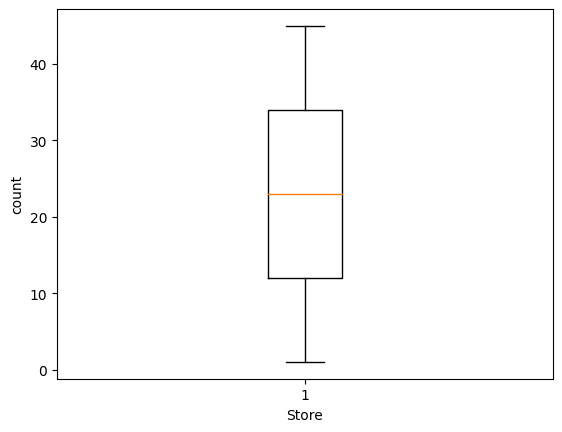

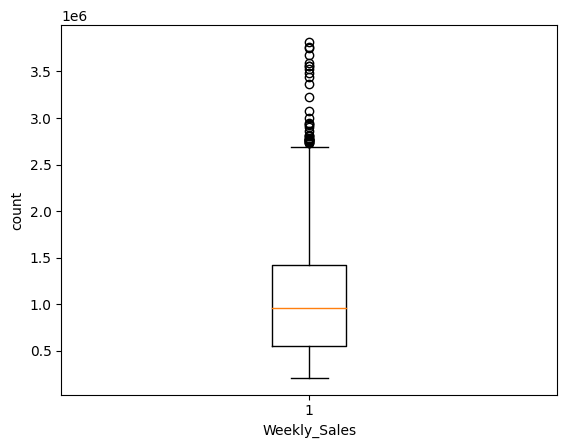

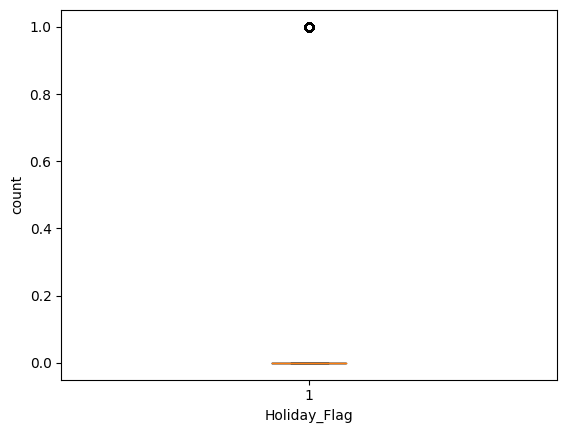

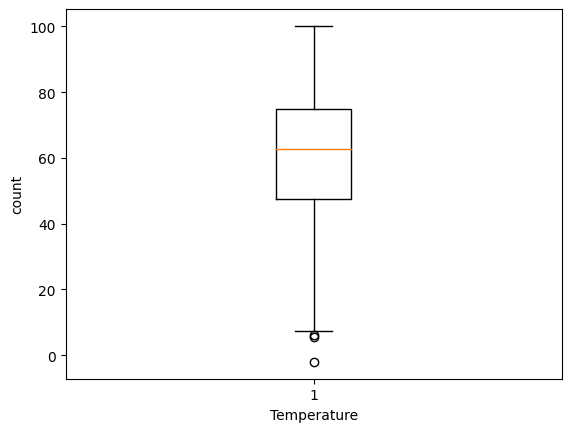

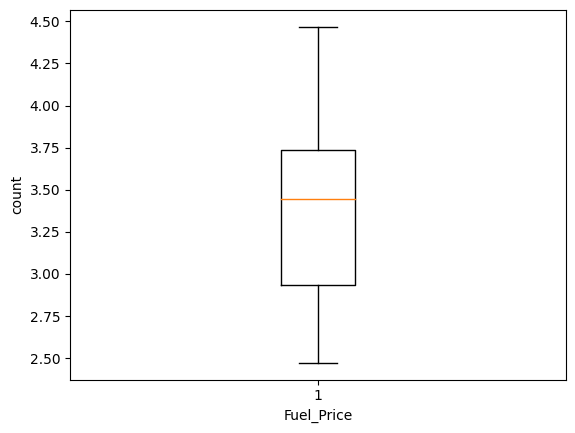

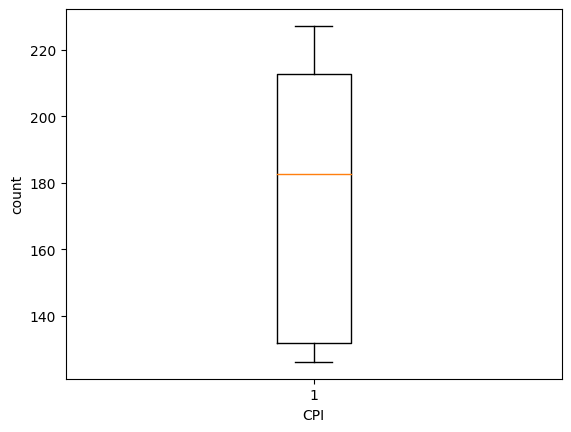

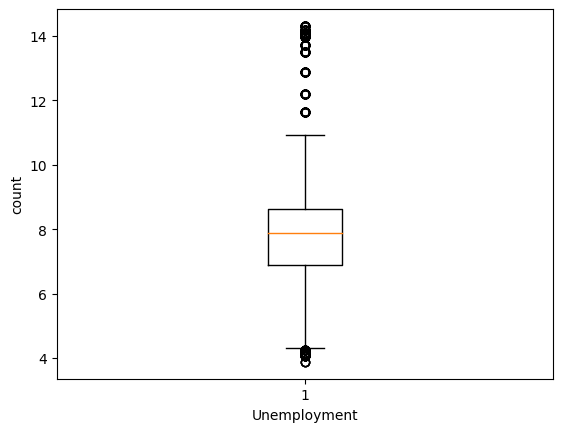

In [125]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [126]:
# As per the box plot Analysis ,there are outliers present in these columns : Weekly_Sales, Holiday_Flag, Temperature, Unemployment...


In [127]:
#Lets find out the quantiles and inter-quantile-range and remove the outliers as it is not required for the analysis...
#So,lets apply the this technique to remove outlier from the above mentioned columns...

In [129]:
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Weekly_Sales >= Q1 - 1.5*IQR) & (df.Weekly_Sales <= Q3 + 1.5*IQR)]


Q1 = df.Temperature.quantile(0.25)
Q3 = df.Temperature.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Temperature >= Q1 - 1.5*IQR) & (df.Temperature <= Q3 + 1.5*IQR)]


Q1 = df.Unemployment.quantile(0.25)
Q3 = df.Unemployment.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Unemployment >= Q1 - 1.5*IQR) & (df.Unemployment <= Q3 + 1.5*IQR)]

In [130]:
#Running the loop again to check the outliers:

**RESULT :-- No oultiers Present after treating it in all the mentioned columns**

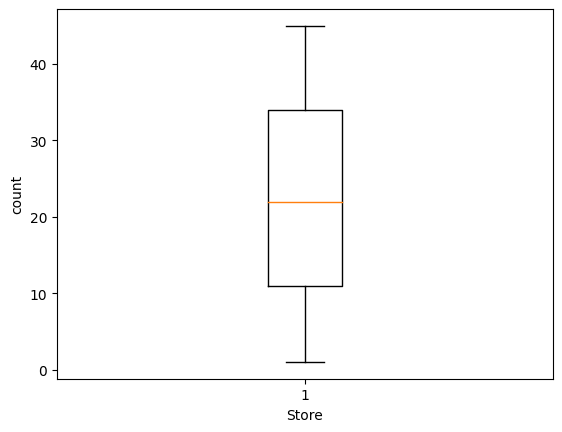

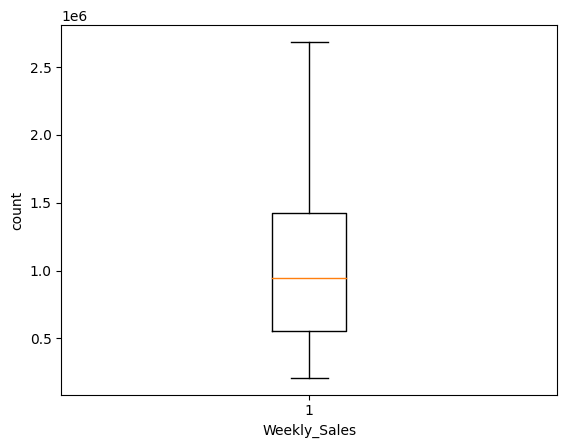

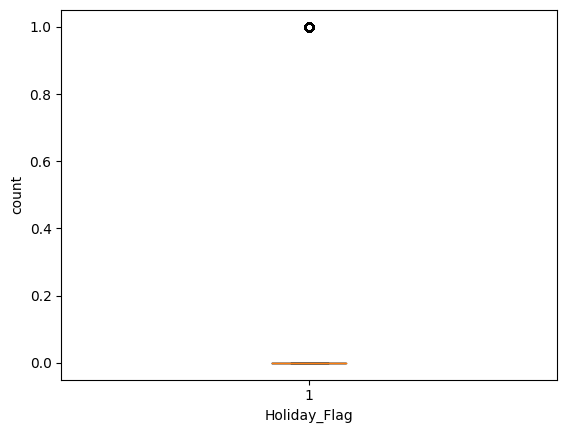

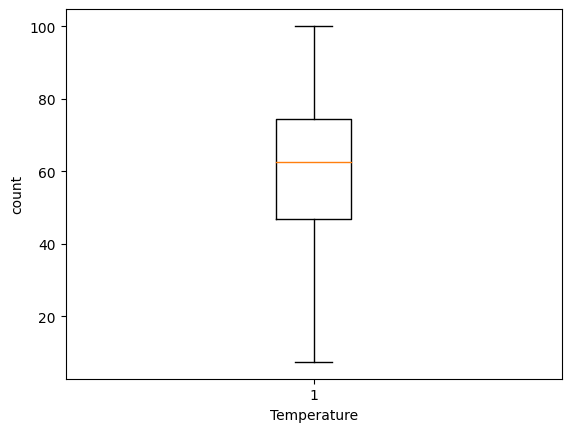

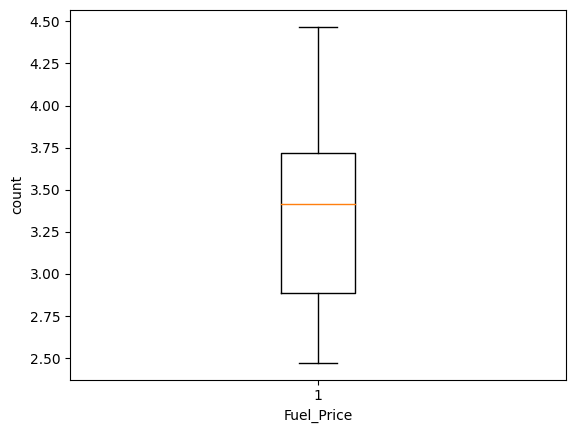

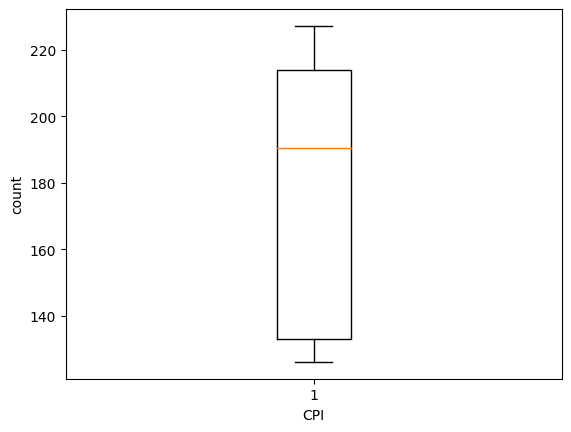

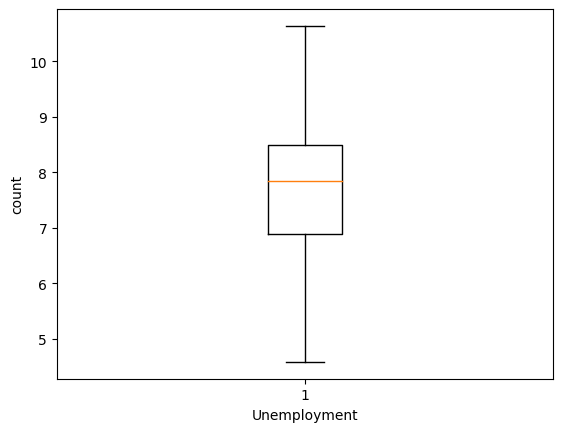

In [131]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

# Problem Statements : Solutions

# A. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [132]:
df.corr().T

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.003093,-0.315472,0.002440,-0.023906,0.046681,-0.210509,0.321647
Date,-0.003093,1.000000,-0.011877,-0.012636,0.155867,0.773782,0.105870,-0.273626
Weekly_Sales,-0.315472,-0.011877,1.000000,0.024939,-0.039955,0.018874,-0.078729,-0.051712
Holiday_Flag,0.002440,-0.012636,0.024939,1.000000,-0.156868,-0.078764,0.000568,0.013504
Temperature,-0.023906,0.155867,-0.039955,-0.156868,1.000000,0.135996,0.231159,-0.011210
Fuel_Price,0.046681,0.773782,0.018874,-0.078764,0.135996,1.000000,-0.133509,-0.125213
CPI,-0.210509,0.105870,-0.078729,0.000568,0.231159,-0.133509,1.000000,-0.230645
Unemployment,0.321647,-0.273626,-0.051712,0.013504,-0.011210,-0.125213,-0.230645,1.000000


# **Visualize the relationship between Unemployment Rate and Weekly Sales**

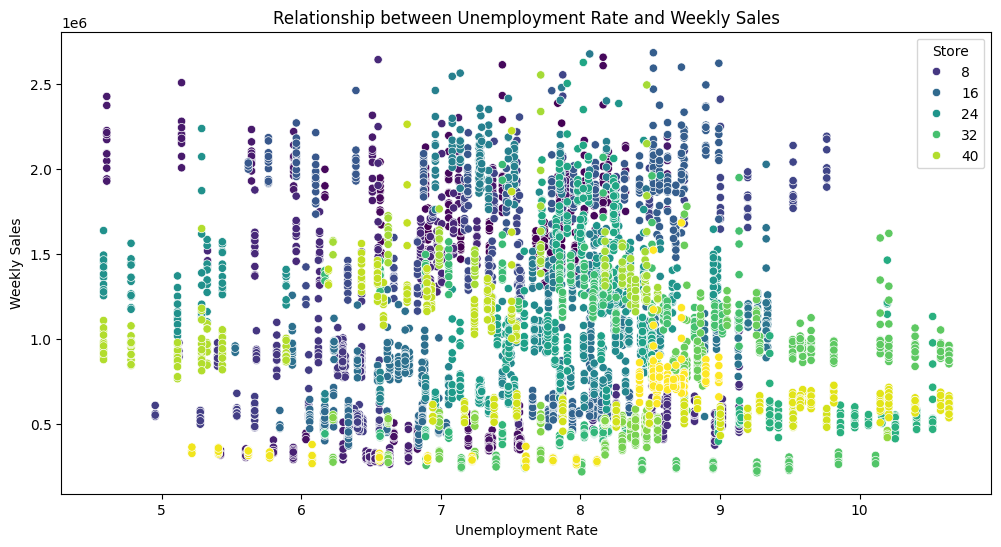

Correlation between Unemployment Rate and Weekly Sales: -0.05171181238025344
The store most affected by changes in the unemployment rate is Store 36


In [133]:
# Visualize the relationship between Unemployment Rate and Weekly Sales
plt.figure(figsize=(12,6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, hue='Store', palette='viridis')
plt.title('Relationship between Unemployment Rate and Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

#  correlation analysis
correlation = df['Unemployment'].corr(df['Weekly_Sales'])
print(f'Correlation between Unemployment Rate and Weekly Sales: {correlation}')

# stores most affected by changes in the unemployment rate
store_correlations = df.groupby('Store').apply(lambda group: group['Unemployment'].corr(group['Weekly_Sales']))
most_affected_store = store_correlations.idxmax()

print(f'The store most affected by changes in the unemployment rate is Store {most_affected_store}')

**Solution : Clearly ,the correlation of columns 'Weekly_Sales' & 'Unemployment' are negative .there is no such dependency between both of them,so 'Unemployment' its not affecting 'Weekly_Sales'**

# **b. If the weekly sales show a seasonal trend, when and what could be the reason?**

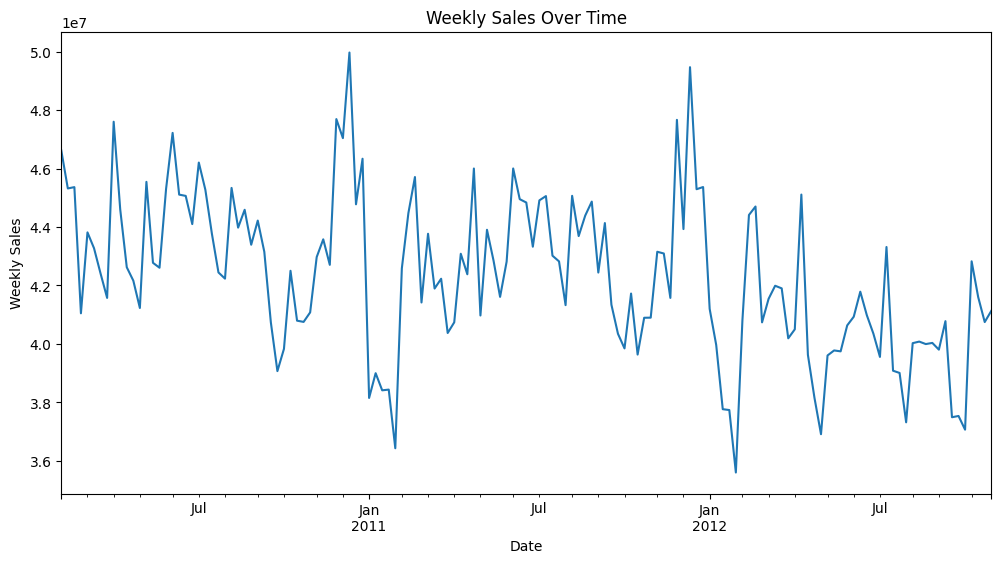

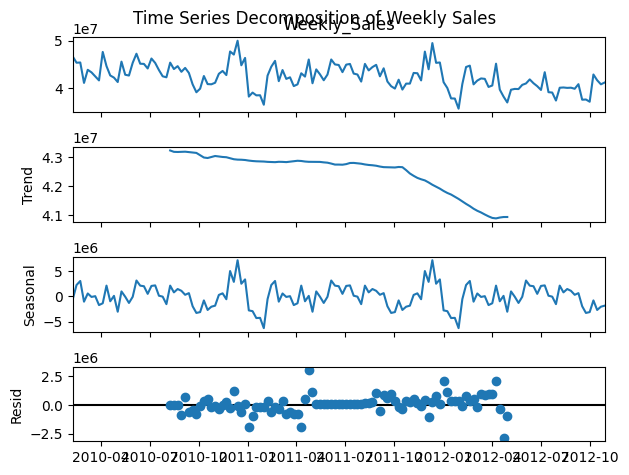

In [134]:
import statsmodels.api as sm

# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')
df.set_index('Date', inplace=True)

# Ensure the time series has a consistent frequency
df = df.resample('W').sum()  # Assuming weekly data; adjust frequency as needed

# Plot weekly sales over time to identify seasonal patterns
plt.figure(figsize=(12, 6))
df['Weekly_Sales'].plot(title='Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Decompose the time series to identify seasonal, trend, and residual components
decomposition = sm.tsa.seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)  # Specify the period (e.g., 52 weeks in a year)
decomposition.plot()
plt.suptitle('Time Series Decomposition of Weekly Sales')
plt.show()

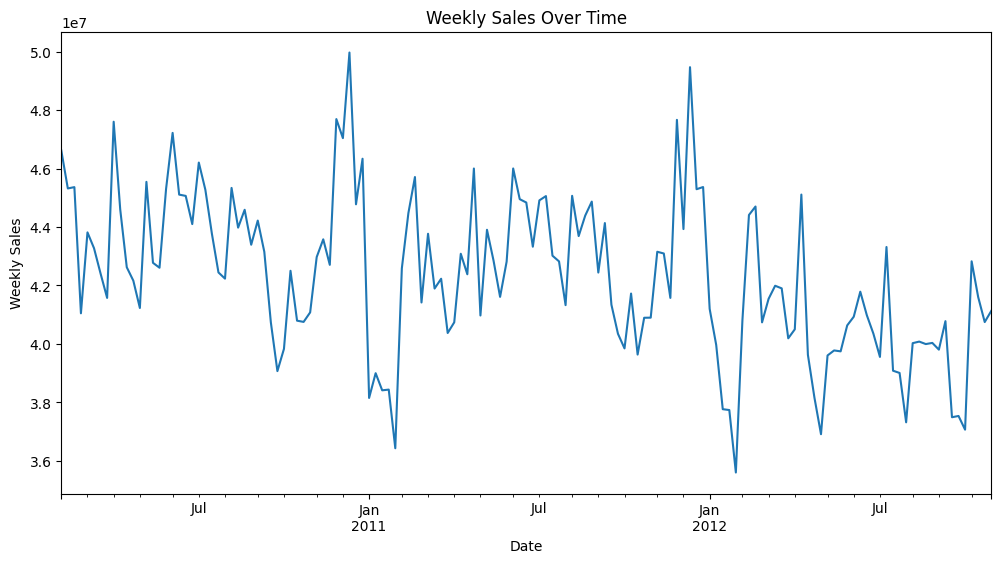

In [135]:
# Plot weekly sales data
plt.figure(figsize=(12, 6))
df['Weekly_Sales'].plot(title='Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

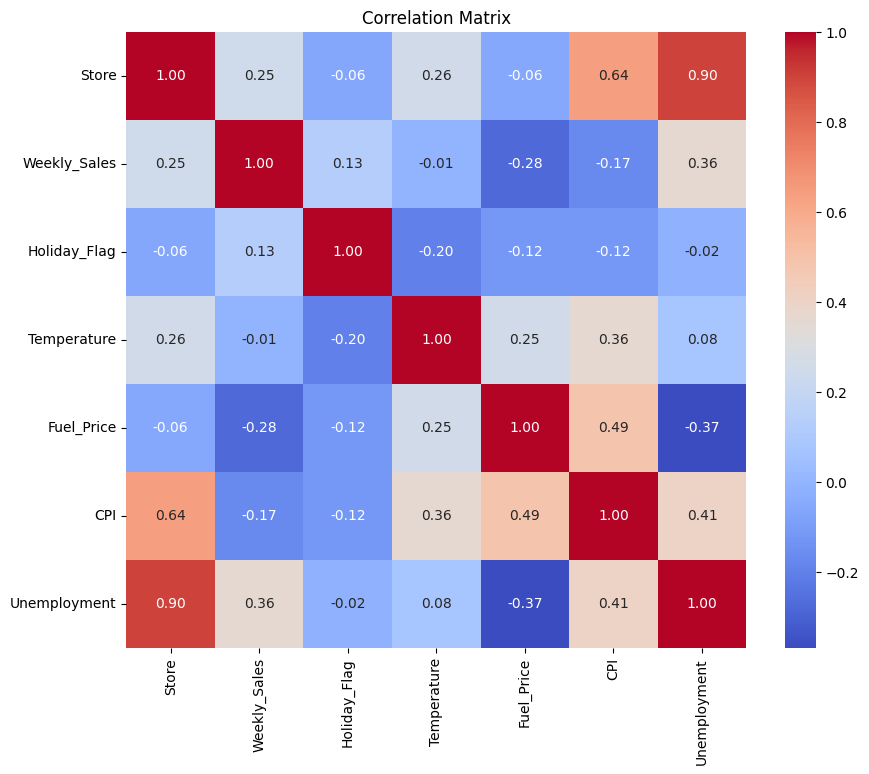

The factor with the highest correlation to Weekly Sales is 'Weekly_Sales' with a correlation value of 1.00.


In [136]:
'''# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')
df.set_index('Date', inplace=True)'''

# Calculate correlation matrix
correlation_matrix = df.corr()

# Identify the column with the highest correlation with 'Weekly_Sales'
highest_correlation_column = correlation_matrix['Weekly_Sales'].idxmax()
highest_correlation_value = correlation_matrix['Weekly_Sales'].max()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(f"The factor with the highest correlation to Weekly Sales is '{highest_correlation_column}' with a correlation value of {highest_correlation_value:.2f}.")

# **Solution: As per the pattern observed ,weekly sales over time shows seasonal patterns as there are no features variation in the columns**

# **c. Does temperature affect the weekly sales in any manner?**

<ipython-input-137-02bea0e3e7d0>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, palette='viridis')


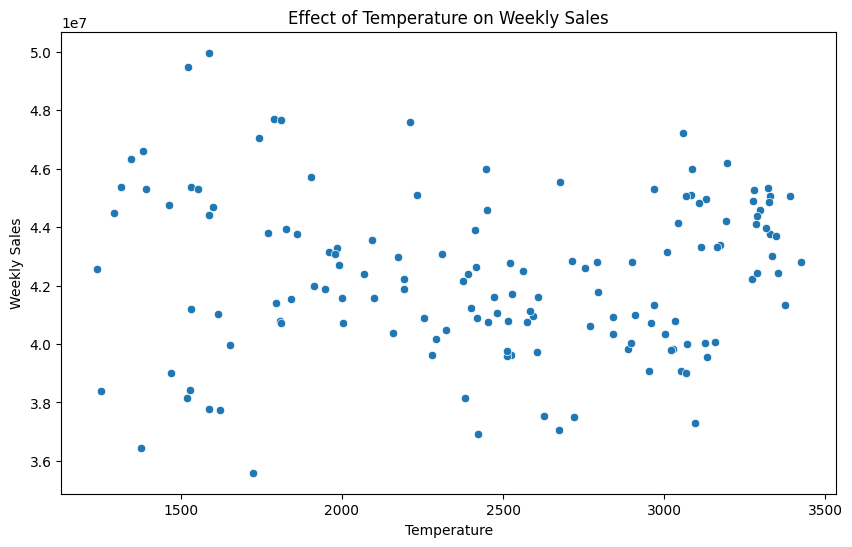

Correlation between Temperature and Weekly Sales: -0.01


In [137]:
'''# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')
df.set_index('Date', inplace=True)'''

# Calculate correlation between 'Temperature' and 'Weekly_Sales'
correlation_temperature_sales = df['Temperature'].corr(df['Weekly_Sales'])

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, palette='viridis')
plt.title('Effect of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

print(f"Correlation between Temperature and Weekly Sales: {correlation_temperature_sales:.2f}")

# **Solution :Temperature is not affecting Weekly sales in any way as it is observed from the scatter plot and correlation matrix**

# **D. How is the Consumer Price index affecting the weekly sales of various stores?**

<ipython-input-138-45ef81eb4c55>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, palette='viridis')


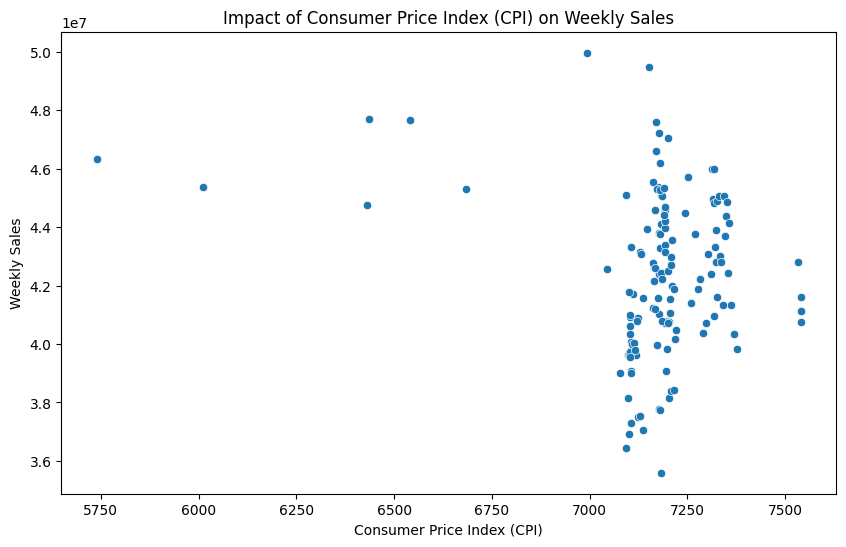

Correlation between CPI and Weekly Sales: -0.17


In [138]:
'''
# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')
df.set_index('Date', inplace=True)'''

# Calculate correlation between 'CPI' and 'Weekly_Sales'
correlation_cpi_sales = df['CPI'].corr(df['Weekly_Sales'])

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, palette='viridis')
plt.title('Impact of Consumer Price Index (CPI) on Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

print(f"Correlation between CPI and Weekly Sales: {correlation_cpi_sales:.2f}")

# **e. Top performing stores according to the historical data**

In [139]:
import pandas as pd

# Average sales data by store
store_performance = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Rank stores based on total sales
top_stores_total_sales = store_performance.sort_values(by='Weekly_Sales', ascending=False)

# Display the top-performing stores based on total sales
print("Top-performing stores based on total sales:")
print(top_stores_total_sales)

Top-performing stores based on total sales:
    Store  Weekly_Sales
11    957  3.452418e+09
4     890  1.034591e+09
5     894  9.533313e+08
12    968  1.662927e+08
6     896  9.246748e+07
8     937  4.997058e+07
2     847  4.766585e+07
1     838  4.633496e+07
0     804  4.536620e+07
3     857  4.529120e+07
10    950  4.258178e+07
9     940  3.899336e+07
7     931  3.642383e+07


# **f. The worst performing store, and how significant is the difference between the highest and lowest performing stores**

In [140]:
# Aggregate sales data by store
store_performance = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Rank stores based on total sales in ascending order (from lowest to highest)
worst_store_total_sales = store_performance.sort_values(by='Weekly_Sales', ascending=True)

# Display the worst-performing store based on total sales
print("Worst-performing store based on total sales:")
print(worst_store_total_sales.head(1))  # Display the store with the lowest total sales

Worst-performing store based on total sales:
   Store  Weekly_Sales
7    931   36423831.94


# **Difference between the highest and lowest performing stores¶**

In [141]:
# Aggregate sales data by store
store_performance = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Find the worst-performing store based on total sales
worst_store = store_performance.sort_values(by='Weekly_Sales').head(1)

# Find the best-performing store based on total sales
best_store = store_performance.sort_values(by='Weekly_Sales', ascending=False).head(1)

# Calculate the difference between the highest and lowest performing stores
difference_between_stores = best_store['Weekly_Sales'].values[0] - worst_store['Weekly_Sales'].values[0]

# Display the worst-performing store and the difference
print(f"Worst-performing store based on total sales:\n{worst_store}")
print(f"\nBest-performing store based on total sales:\n{best_store}")
print(f"\nDifference between highest and lowest performing stores: {difference_between_stores}")

Worst-performing store based on total sales:
   Store  Weekly_Sales
7    931   36423831.94

Best-performing store based on total sales:
    Store  Weekly_Sales
11    957  3.452418e+09

Difference between highest and lowest performing stores: 3415994186.93


# **Sales Forecasting using SARIMA Model**

Mean Squared Error (MSE): 118844186498631.97


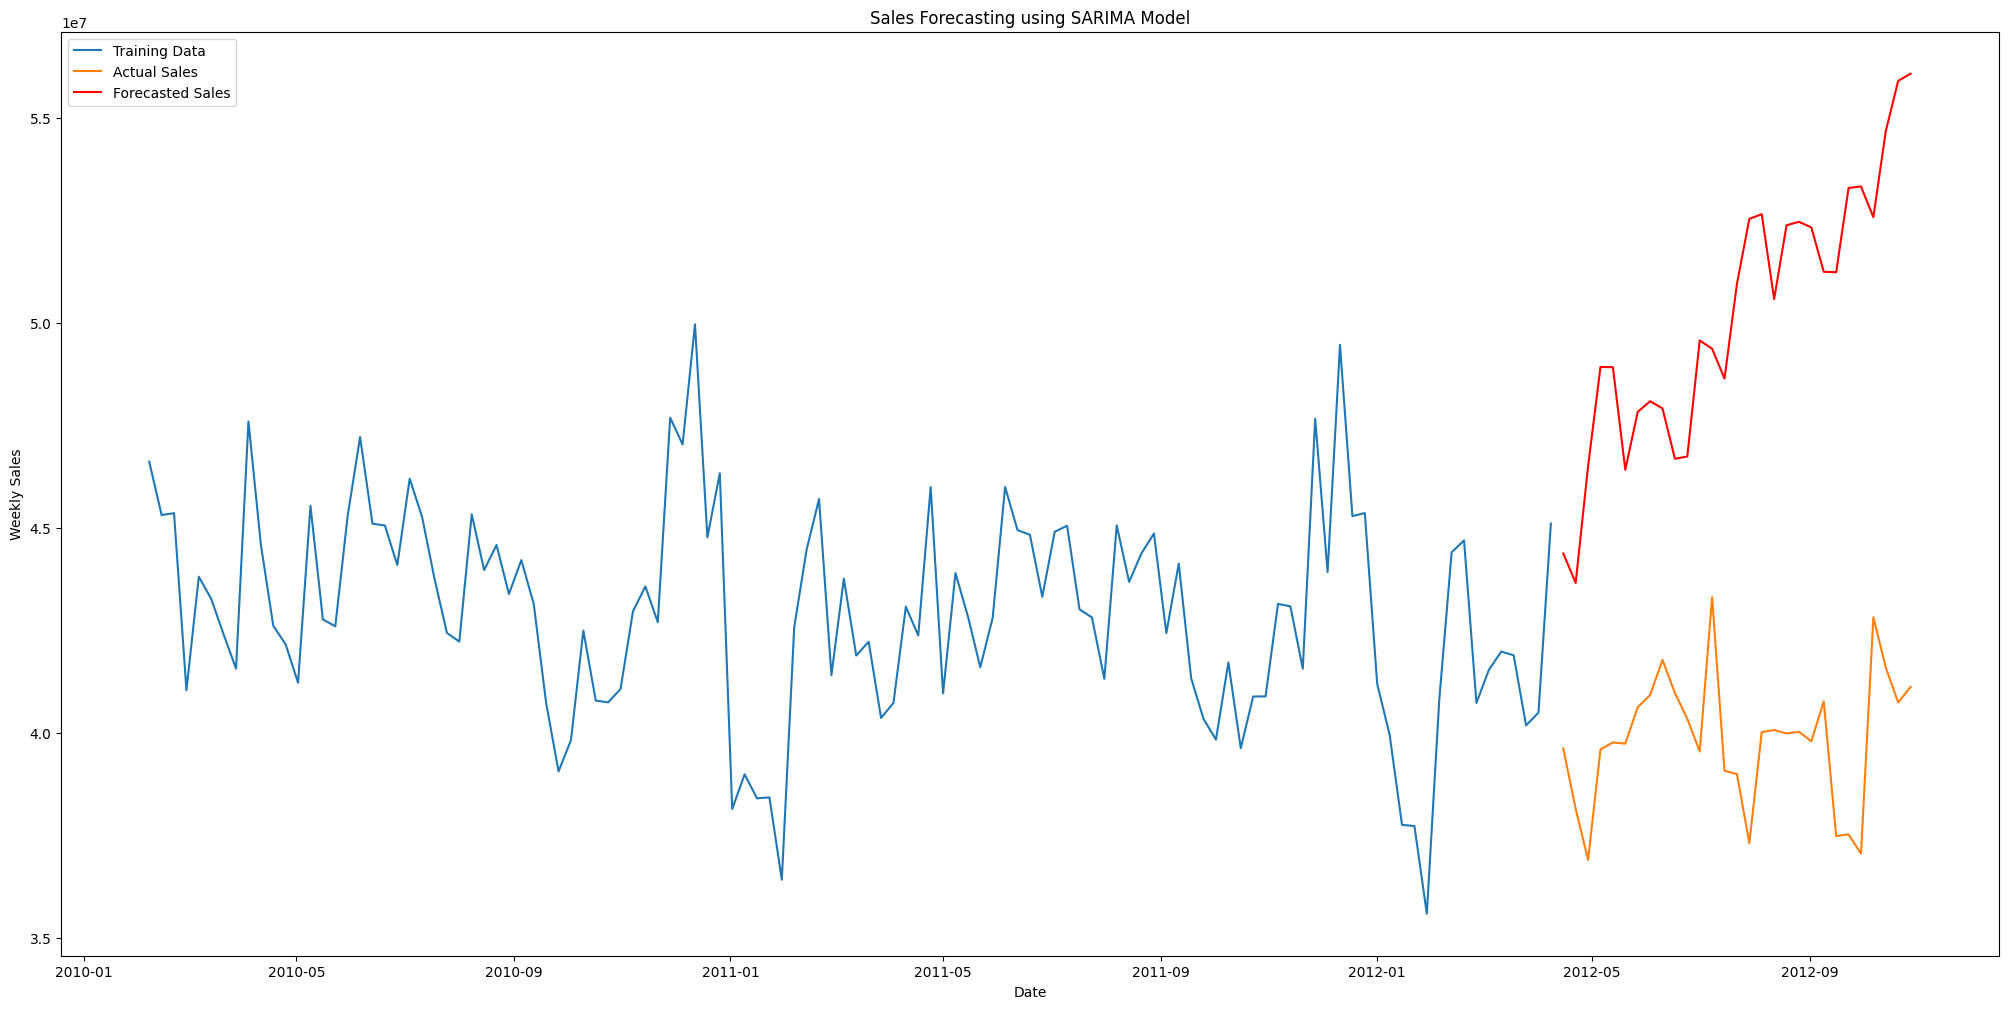

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
sales_data = df['Weekly_Sales']

# Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Define and fit the SARIMA model
order = (1, 1, 1)  # Example order parameters (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order parameters (P, D, Q, s)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecast sales for the test set
forecast = result.get_forecast(steps=len(test))

# Evaluate the model performance
mse = mean_squared_error(test, forecast.predicted_mean)
print(f"Mean Squared Error (MSE): {mse}")

# Visualize the results
plt.figure(figsize=(25, 12))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Sales')
plt.plot(forecast.predicted_mean, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting using SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-07 to 2012-10-28
Freq: W-SUN
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Weekly_Sales  143 non-null    float64
 2   Holiday_Flag  143 non-null    int64  
 3   Temperature   143 non-null    float64
 4   Fuel_Price    143 non-null    float64
 5   CPI           143 non-null    float64
 6   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 8.9 KB


# **Model Implementation -- Sales Forecast for 12 weeks -- Stores included Stores 1,2,3,4,5 (Generating a Forecasts for all 45 stores increases time complexity,hence did it for only 5 stores for evaluation purpose)**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


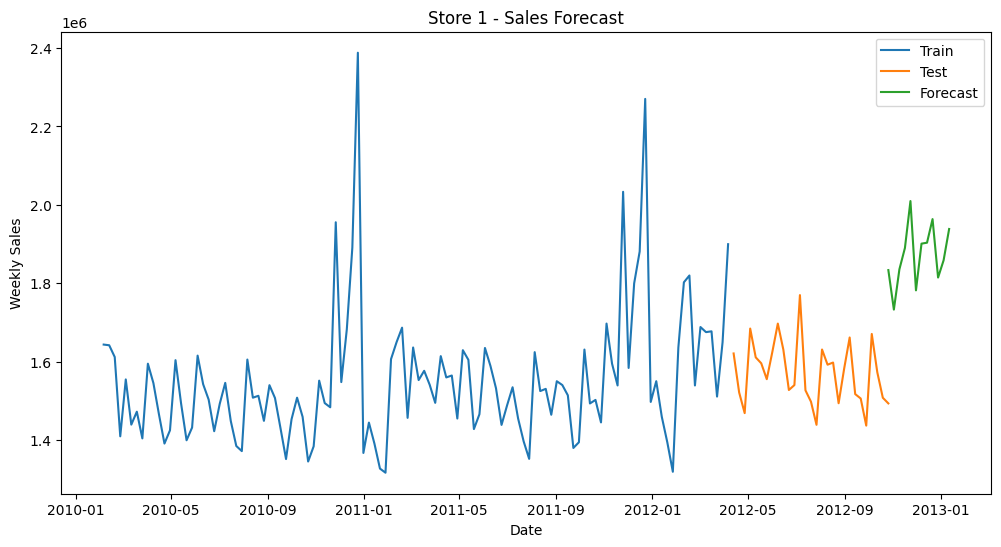

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


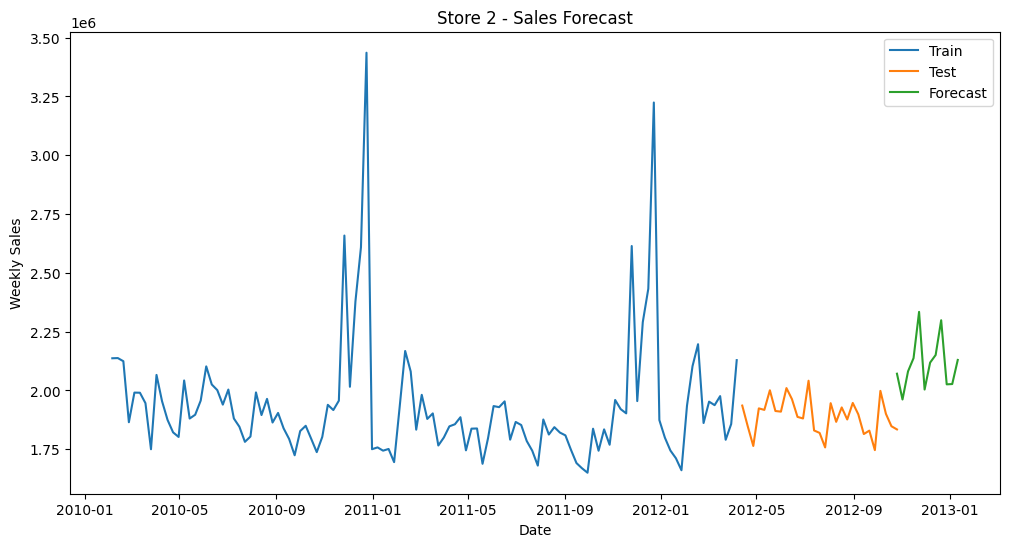

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


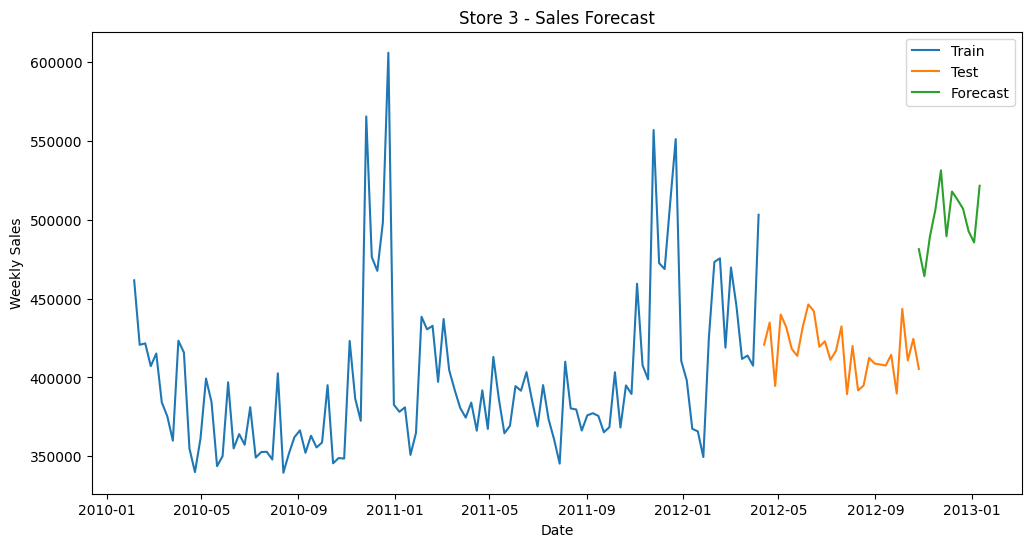

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


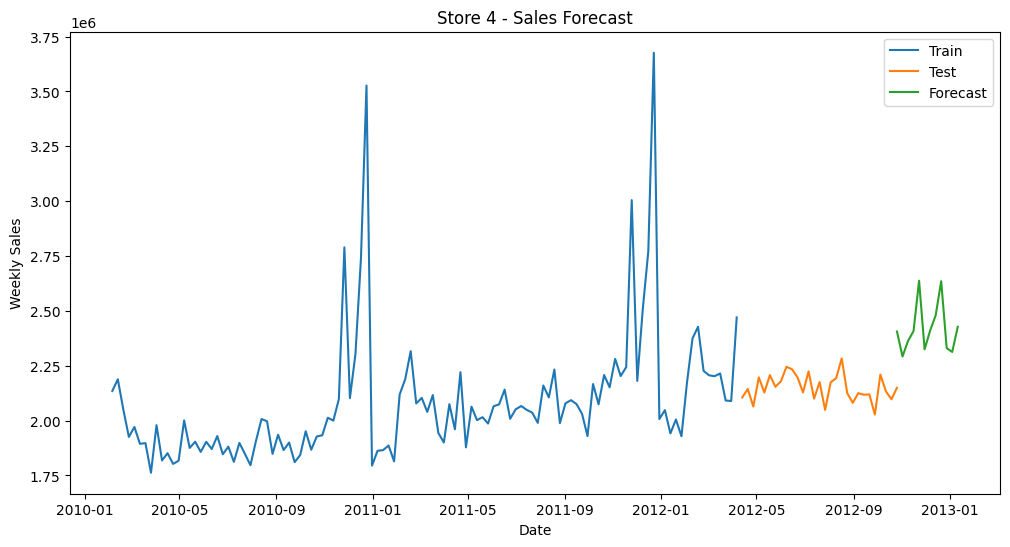

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


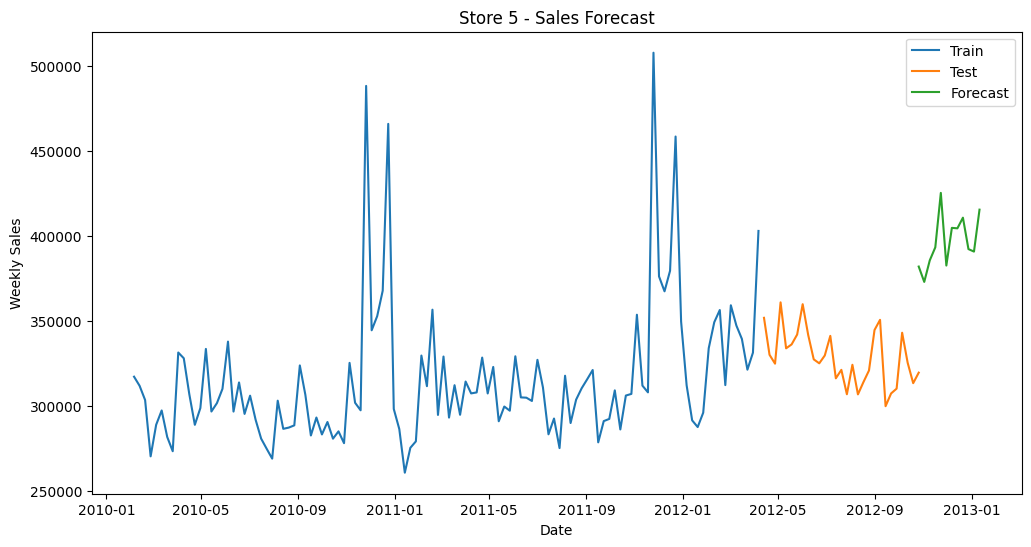

In [144]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Walmart.csv')

# Assume you want to forecast sales for Store 1, 2, 3, 4, and 5
stores_to_forecast = [1, 2, 3, 4, 5]

for store_number in stores_to_forecast:
    # Filter data for the specific store
    store_data = data[data['Store'] == store_number].copy()

    # Extract relevant columns
    store_data = store_data[['Date', 'Weekly_Sales']]

    # Convert the 'Date' column to datetime
    store_data['Date'] = pd.to_datetime(store_data['Date'],format = '%d-%m-%Y')

    # Set 'Date' as the index
    store_data.set_index('Date', inplace=True)

    # Split the data into training and testing sets
    train_size = int(len(store_data) * 0.8)
    train, test = store_data.iloc[:train_size], store_data.iloc[train_size:]

    # Fit SARIMA model
    order = (1, 1, 1)  # Order of non-seasonal part
    seasonal_order = (1, 1, 1, 12)  # Order of seasonal part

    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit(disp=-1)

    # Forecast for the next 12 weeks
    forecast_steps = 12
    forecast = fitted_model.get_forecast(steps=forecast_steps)

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['Weekly_Sales'], label='Train')
    plt.plot(test.index, test['Weekly_Sales'], label='Test')
    plt.plot(pd.date_range(start=test.index[-1], periods=forecast_steps, freq='W-FRI'), forecast.predicted_mean, label='Forecast')
    plt.title(f'Store {store_number} - Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

# **END OF THE PROJECT**